[Day 2 afternoon **_"handling and plotting Big Data"_**]

<a name="top"></a>Handling and plotting Big Data
===

<a name="top"></a>Outline
---

* [Hierarchical Data Format HDF5](#HDF5)
  * [Opening a File](#opening a file)
  * [Creating a HDF5 file](#creating a file)
  * [Attributes](#attributes)
  * [Existance testing](#existance testing)
  * [Iterating over a file](#iterating over a file)
  * [A word on the library](#a word on the library)
* [Exercise: HDF5](#exercise01)
* [Interactive plotting with Bokeh](#bokeh)
  * [Basic plotting interface](#bokeh intro)
  * [Handling big data](#big data)
  * [Interactive plotting](#interactive)
* [Exercise: Bokeh](#exercise02)

##### Introduction

To investigate data, we often need to visualize it in some way to make it understandable for humans. Often spending an hour or two just _looking_ at the various aspects of a dataset without quantifying much is a worthy investment - we call this _explorative analysis_. That way you get a feeling of what information your dataset holds and what questions would be worthwhile to ask.  

After you have seen how Matplotlib and Seaborn can be used to visualize data, we want to show you how you can use python to handle and visualize truly big datasets using HDF5 and Bokeh.

**Learning goals:** By the end or this lecture you will
* know when to use a hierarchical format
* know how to write and read data in hierarchical format
* have an idea about how to deal with visualization of really big datasets
* know how to create interactive plots with Bokeh

[top](#top)

<a name="HDF5"></a>Hierarchical Data Format HDF5
===

Hierarchical data formats have several advantages:
* access to parts of large files without loading the whole file into RAM
* intuitive and quick navigation inside the file following POSIX convenctions
* storage of metadata right next to the data

Why would we want that? Modern computers have 8-24 GB RAM. Everything that is larger needs to be _swapped_ from the hard drive where access times are really slow. Modern data-centered science is prone to create files much larger than that (particle collisions, cosmological observations, high resolution images...)

#### POSIX

People familiar with UNIX systems are intuitively familiar with the POSIX-style hierarchy 

```/path/to/file```

Different levels of the hierarchy are separated by forward-slashes. The single forward slash

```/``` 

is the "root" of the file, sub-levels can be accessed by using the full path beginning with root or relative paths.

[top](#top)

<a name="opening a file"></a>Opening a (HDF5) File
---

In [1]:
import h5py
import numpy as np

In [ ]:
# create a hierarchical data file and access it in "read and write" mode
f = h5py.File("testfile.hdf5", "a")

Some modes are
* ```w```: write, overwrites file if it already exists, creates a new one otherwise
* ```r```: read
* ```r+```: read, write
* ```a```: read, write, append (creates a new file if file doesn't exist, appends otherwise)

Complete list at https://www.tutorialspoint.com/python/python_files_io.htm

In [ ]:
print(f.name) # f is the "root"

When we open a file (any file!), we create a _handle_ of the file in the form of a Python object. This is different than accessing for example a numpy array that only exist in the part of the RAM that our Python script uses.

The file exists on the hard drive and can be _created_, _read_ and _written_ to. For reading and writing information is piped to our script via a buffer. This is all handled in the background. The only thing we have to keep in mind is the kind of access we have to a file whose handle we use in our script.

[top](#top)

<a name="creating a file"></a>Creating a HDF5 File
---

HDF5 file objects offer several methods to add, delete and modify their content. Their general structure can be broken down into
* **datasets** which are basically tables (imagine NumPy arrays) and
* **groups** which can be imagined like _folders_ that contain other groups or datasets.

In [ ]:
fruits = f.create_group('fruits')
vegetables = f.create_group('vegetables');

In [ ]:
print(fruits.name)

In [ ]:
cow = f.create_group('meat/cow')
print(cow.name)

In [ ]:
# create a dataset in a group
oranges = fruits.create_dataset("oranges", (100,10), dtype="i")
apples = fruits.create_dataset("apples", (100,10), dtype="i")

In [ ]:
print(apples.name)

**Important**:
* groups work like python dictionaries
* datasets work like NumPy arrays

In [ ]:
# access in a key-value style
fruits['oranges']

In [ ]:
# access via field indices
oranges[0,0]

[top](#top)

<a name="attributes"></a>Attributes
---

One of the best features of HDF5 is that you can store metadata right next to the data it describes. All groups and datasets support attached named bits of data called _attributes_.

Don't underestimate the power of this feature! It is very handy to have this information 
* in the same place and inseparable from the data (so it can't get lost)
* easily accessible and iterable (so you don't require any awkward parsing from headers of text- or csv files)

In [ ]:
# dictionary structure allows to save metadata right next to
# the data as attributes
oranges.attrs['color'] = 'orange'
print(oranges.attrs['color'])

Attributes can be attached to both ```group``` and ```dataset``` objects

In [ ]:
# note the 'attrs' proxy to get to the attributes
f.attrs['date'] = '2018-02-18'
print(f.attrs['date'])

[top](#top)

<a name="existence testing"></a>Existance testing
---

Using the keyword ```in``` we can check if a dataset or group exists within a file or group:

In [ ]:
'oranges' in fruits

In [ ]:
'apples' in fruits

In [ ]:
# this will yield "False" because membership is only tested on
# the accessed level (in this case root)
'apples' in f

In [ ]:
# this will yield "True" because by using the POSIX nomenclature
# we access the subgroup level "fruits"
'fruits/apples' in f

In [ ]:
'pineapples' in fruits

[top](#top)

<a name="iterating over a file"></a>Iterating over a file
---

Groups also allow for iteration over their members

#### Iterating over a level

In [ ]:
for name in f:
    print(name)

In [ ]:
for name in fruits:
    print(name)

In [ ]:
f.visit(print)

#### Iterating over the whole file

In [ ]:
def MyPersonalPrintFunction(name):
    print("jana's " + name)

In [ ]:
f.visit(MyPersonalPrintFunction)

[top](#top)

<a name="a word on the library"></a>A word on the library
---

```h5py``` very closely wraps the underlying ```C``` API. There is another rather similar library ```pytables```, which does the same thing but adds some higher level functionality (have a look at http://www.pytables.org/ for more details).

The choice to introduce ```h5py``` and not ```pytables``` is pretty arbitrary. In the future they might be refactored into a different structure where ```h5py``` wraps the ```C``` API and ```pytables``` only accesses ```h5py```'s functionality. Watch out for changes if you decide to use one of these libraries!

<a name="exercise01"></a>Exercise: HDF5
===

1. **Creating a file**
  1. Create a file containing at least three groups
  2. Fill the groups with at least three subgroups
  3. Fill the subgroups with at least three datasets. Each dataset should contain a NxN array. N should be a random number between 50 and 100. Fill each array with random numbers drawn from a gaussian distribution with different mean and standard deviation respectively.
  4. Attach an attribute for the mean and standard deviation to each dataset.
2. **Iterating over a file**
  1. Iterate over all datasets in the file and calculate the number of entries in each array, the mean and standard deviation.
  2. Compare the mean and standard deviation you calculated to the attributes you assigned to the dataset and print both to the command line.
3. **(Optional)**
    1. investigate about graphical user interfaces to inspect HDF5 files (for example ViTables).
    2. See if you can get it to work within a Jupyter notebook (hint: you can use ```pip install``` in the terminal to install new packages to your jupyter-hub server if needed.)

[top](#top)

<a name="bokeh"></a>Interactive plotting with Bokeh
===

<a name="bokeh intro"></a>Basic plotting interface
---

In [2]:
# output_notebook() tells bokeh to embed the plots. Other options are
# output_file() and output_server()
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

Bokeh's approach to plotting is rather similar than Matplotlib's. The only difference is, that it uses _symbol_ based plotting functions rather than _plot type_ based plotting functions. For example
* where matplotlib would use **scatterplot()**, bokeh uses **circles()**
* where matplotlib uses **plot()**, boke uses **lines()**. 

Similar to matplotlib bokeh creates a canvas on which the plotted objects reside using the **figure()** function. It also returns the plotted objects when calling the respective plotting functions.

In [3]:
# create the canvas
fig = figure(plot_width=400, plot_height=400)

# add a circle renderer with a size, color, and alpha
fig.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], \
    size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)

show(fig) # show the results

[top](#top)

<a name="big data"></a>Handling big data
---

There are limitations to how much data can be shown in the way we used to in the examples above. Most web browsers can handle up to about 100,000 or 200,000 datapoints in a Bokeh plot before they will slow down or have memory issues. If we have larger datasets than that, one option is to use the ```datashader``` module.

In [4]:
import datashader as ds
import datashader.transfer_functions as tf

##### When _not_ to use datashader
* when plotting less than $10^6$ datapoints
* when _every_ datapoint matters (and not just distributions)
* when full interactivity with _every_ datapoint is necessary

##### When _to_ to use datashader
* when Matplotlib/Seaborn/Bokeh run into memory issues
* when _distribution_ matters more than individual points
* when sampling/binning to understand the distribution anyways

##### How does it work?

![datashader](https://raw.githubusercontent.com/bokeh/datashader/master/docs/images/pipeline2.png)

* datashader renders data into screen-sized aggregate arrays
* from the aggregates an image can be constructed and then embedded into a bokeh plot
* this way only the fixed-size image needs to be sent to the browser  

The datashader currently supports
* scatterplots
* heatmaps
* timeseries
* trajectories
* rasters

##### Example

In [5]:
# create five gaussian distributions with 10⁶ points each and sum them 
# to make up our dataset
seed=5
np.random.seed(seed)
num=1000000

# the distributions are centered at (2,2), (2,-2), (-2,-2), (-2,2) and
# (0,0) and have a sigma of 0.01, 0.1, 0.5, 0.75 and 1.0 respectively
dists = {cat: pd.DataFrame(dict(x=np.random.normal(x,s,num),
                                y=np.random.normal(y,s,num),
                                val=val,cat=cat))
         for x,y,s,val,cat in 
         [(2,2,0.01,10,"d1"), \
          (2,-2,0.1,20,"d2"), \
          (-2,-2,0.5,30,"d3"), \
          (-2,2,0.75,40,"d4"), \
          (0,0,1.0,50,"d5")]}

# dislay the dataframe containing the data
df = pd.concat(dists,ignore_index=True)
df["cat"]=df["cat"].astype("category")
df.tail()

,cat,val,x,y
4999995,d5,50,0.585353,0.258123
4999996,d5,50,-0.828386,-0.199673
4999997,d5,50,-1.612045,-0.366705
4999998,d5,50,-1.446435,-0.218827
4999999,d5,50,-2.954241,1.986843


In the first step, we define
* the size of the window we want to project our data into
* the reduction function we want to use

In [6]:
# create the canvas with a height/width in screen units to which the
# height/width in data units is projected
canvas = ds.Canvas(plot_width=300, plot_height=300, \
                   x_range=(-4,4), y_range=(-4,4))

# create an aggregate of the x and y columns of the data using the 
# ds.count() function to aggregate
agg = canvas.points(df, 'x', 'y', agg=ds.count())

_aggregation function examples:_  
* **count():** integer count of datapoints for each pixel  
* **any():** 1 for each pixel if it containy any datapoint, 0 otherwise
* **count_cat(column):** count datapoints per category

With the aggregate created we can use the datashader to actually display it:

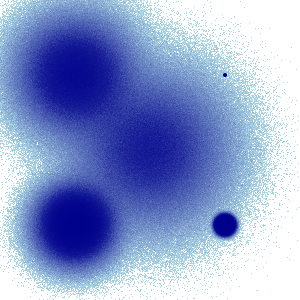

In [7]:
tf.shade(agg)

The aggregate itself is a numpy array that we can filter and manipulate to our liking:

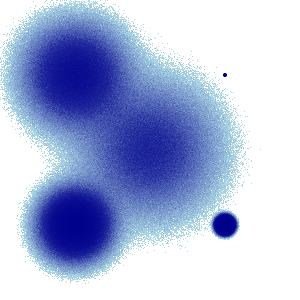

In [8]:
agg_reduced = agg.where(agg >= np.percentile(agg,50))
tf.shade(agg_reduced)

Using the categorical aggregate or a colormap we can make more sense of the data:

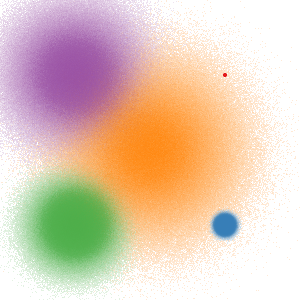

In [9]:
color_key = dict(d1='blue', d2='green', d3='red', d4='orange', d5='purple')
agg_category = canvas.points(df, 'x', 'y', ds.count_cat('cat'))
tf.shade(agg_category, color_key)

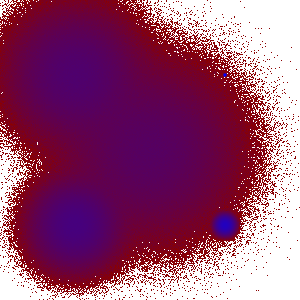

In [10]:
tf.shade(agg,cmap=["darkred", "blue"],how='log')

[top](#top)

<a name="interactive"></a>Interactive plots
---

##### Zooming and panning

Bokeh provides specific support for datashader to allow for fully interactive zooming and panning to explore the dataset:

In [11]:
import bokeh.plotting as bp
from datashader.bokeh_ext import InteractiveImage
bp.output_notebook()

# create a new and larger canvas with interactive tools enabled
p = bp.figure(tools='pan,wheel_zoom,reset', x_range=(-5,5),\
              y_range=(-5,5))

# create a callback function: dynspread spreads pixels in an 
# image dynamically based on the image density.
def image_callback(x_range, y_range, w, h):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, \
                    y_range=y_range)
    agg = cvs.points(df, 'x', 'y', ds.count_cat('cat'))
    img = tf.shade(agg, color_key)
    return tf.dynspread(img, threshold=0.25)

# add the callback function to the interactive image
InteractiveImage(p, image_callback)

Loading BokehJS ...

##### Widgets

Bokeh supports direct integration with a small basic widget set. Thse can be used in conjunction with a Bokeh Server, or with CustomJS models to add more interactive capability to the plots.  

Widgets that have values associated can have small JavaScript actions attached to them. These actions (also referred to as "callbacks") are executed whenever the widget's value is changed.

In [17]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.get('data');
    var f = cb_obj.get('value')
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    source.trigger('change');
""")

slider = Slider(start=0.1, end=4, value=1, step=.1, \
                title="power", callback=callback)

layout = column(slider, plot)

show(layout)

<a name="exercise02"></a>Exercise: Bokeh
===

1. **Big data**
  1. Explore the 'big' dataset we created in the example further (or create a new one): check at what point matplotlib runs into serious efficiency trouble (HINT: %timeit magic)
  2. Try datashader's capabilities for a timeseries - what aggregation functions make sense?
  3. Try datashader's capabilities for trajectories (connected points)
  
  
2. **Interactive plot**
  1. Make an interactive plot that realizes a toggle
  2. Make an interactive plot that realizes a dropdown
  
  
3. **(Optional) Container at Sea**
    1. Download the datset at [http://data.deutschebahn.com/dataset/data-sensordaten-schenker-seefrachtcontainer](http://data.deutschebahn.com/dataset/data-sensordaten-schenker-seefrachtcontainer). The dataset contains GPS traces from contains in Cargo ships. 
    2. Visualize the trajectories on top of a world map by using `bokeh` or `plotly`.

[top](#top)

##### Credits & References

[**h5py**: kudos to **the h5py quick start guide** at http://docs.h5py.org/en/latest/quick.html#install]

[**bokeh**: kudos to **the bokeh tutorials** at http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/tree/master/tutorial/]